<a href="https://colab.research.google.com/github/R4HUL-ROY/Digital-Image-Processing/blob/main/CV_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DIGITAL IMAGE PROCESSING -- ASSIGNMENT 2**

**Name : RAHUL ROY**

**Roll C91/MCA/202032**

**MCA 3RD SEM**

In [2]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

**1.  Histogram Equalization of an image**

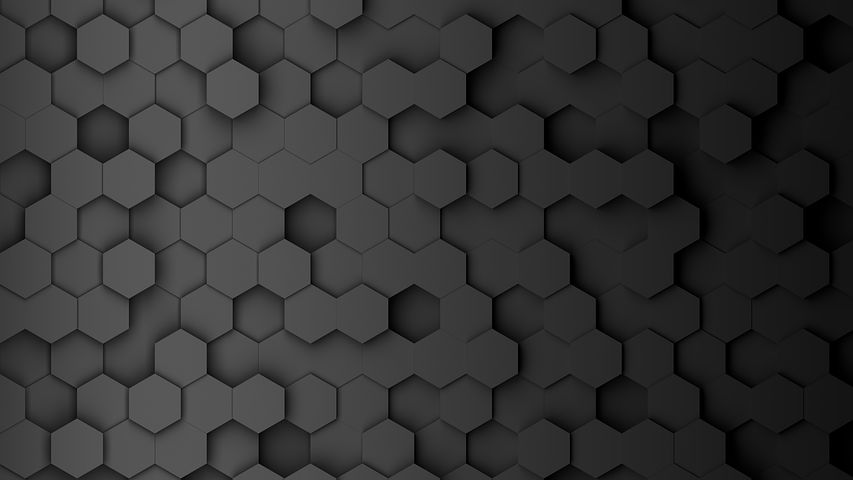

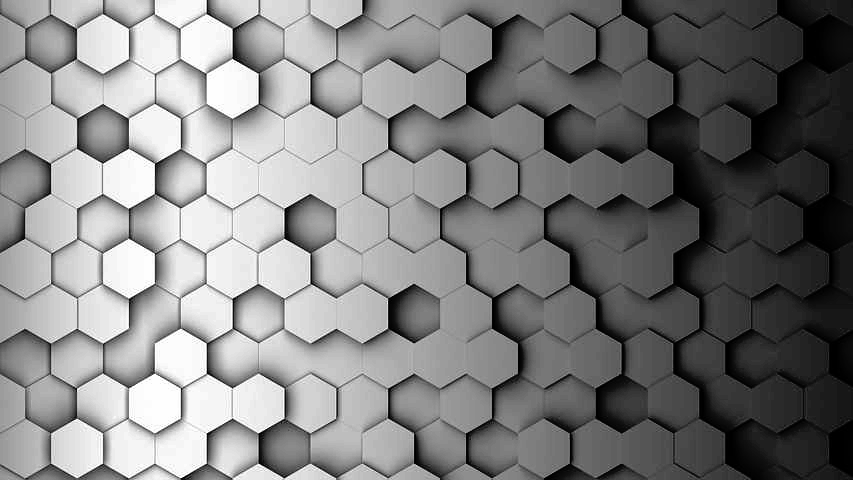

In [84]:
## HISTOGRAM EQUALIZER

def my_hist_equalizer(img):
    arr = np.zeros((256))
    row, col = img.shape
    new_img = np.zeros((row,col))

    ''' Creating Frequency array named "arr" '''
    for i in range(row):
        for j in range(col):
            arr[img[i,j]] += 1
        
    sorted_pixel = list(set(sorted(img.flatten())))
    min_freq, max_freq = min(arr) , max(arr)

    '''Creating Cumulative density function (cdf) Array'''
    cdf = []
    for i in range(len(sorted_pixel)):
        if len(cdf) != 0:
            cdf.append(cdf[-1] + arr[sorted_pixel[i]])
        else:
            cdf.append(arr[sorted_pixel[i]])

    ''' Creating hv Values for corresponding pixels'''        
    hv = []
    min_cdf= min(cdf)
    for i in cdf:
        hv.append(round(((i - min_cdf)/ (row*col - min_cdf)) * 255 ))

    ''' This dictionary holds the current pixel value (key) and its hv Value (value)'''
    pixel_hv_dict = dict(zip(sorted_pixel, hv))

    for i in range(row):
        for j in range(col):
            new_img[i,j] = pixel_hv_dict[img[i,j]]
    return new_img



path = r'/content/8.jpg'
img = cv2.imread(path, 0)
cv2_imshow(img)

new_img = my_hist_equalizer(img)
cv2_imshow(new_img)

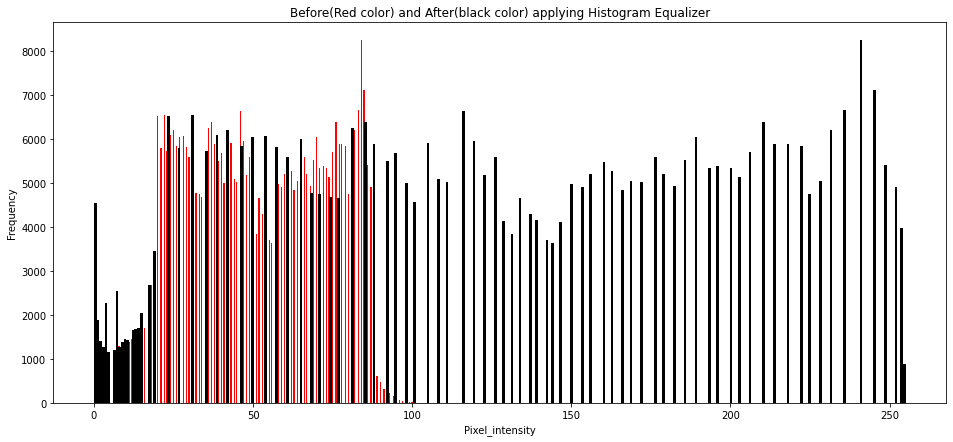

In [87]:
'''Histogram plot before(red color) and after(black color) applying Histogram Equalizer'''

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize =(16, 7))
ax.hist(img.flatten(), bins=300, color='red')
ax.hist(new_img.flatten(), bins=300, color='black')
plt.title('Before(Red color) and After(black color) applying Histogram Equalizer')
plt.xlabel('Pixel_intensity')
plt.ylabel('Frequency')
plt.show()

**2.  Applying Kernel on an image**

input kernel dimension(k) : 3
-1
-1
-1
-1
8
-1
-1
-1
-1


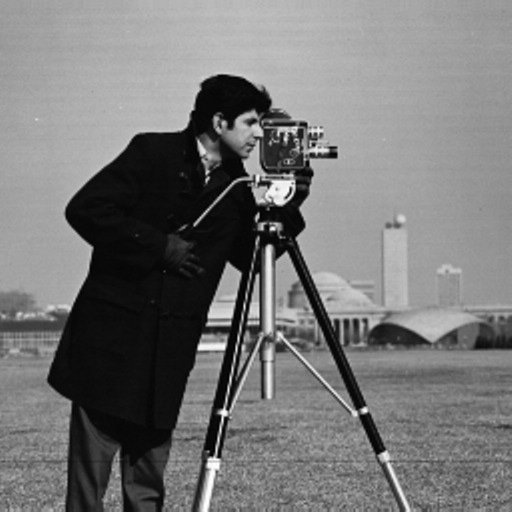

[[159 159 159 ... 153 153 152]
 [155 157 158 ... 152 151 150]
 [156 156 157 ... 152 151 150]
 ...
 [120 121 128 ... 125 116 106]
 [122 119 124 ... 129 117 104]
 [126 122 127 ... 112 110 119]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.  -3.   0. ...   1.  -5.   0.]
 [  0.  -8.  -1. ...   0.  -5.   0.]
 ...
 [  0. -16.  22. ...  16.   6.   0.]
 [  0. -38.  -4. ...  61.  15.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


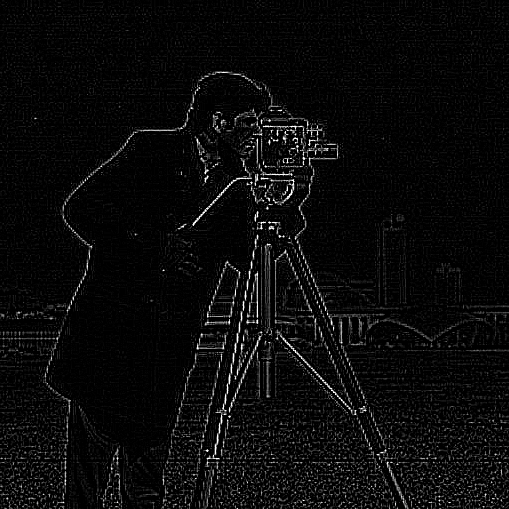

In [4]:
def compute_value(sub_img, kernel):
    '''
        This function takes a 3*3 sub image and kernel as input
        and Returns the computed value for that particular pixel
        after applying the Kernel
    '''
    sum = 0
    k = kernel.shape[0]
    for i in range(k):
        for j in range(k):
            sum += (sub_img[i,j] * kernel[i,j])
    return sum


def apply_kernel(img, kernal):
    '''
        This function takes the entire image and kernel as input
        and compute the value of each pixel by applying the kernel
        and Returns the resultant matrix
    '''
    row, col = img.shape
    k= kernel.shape[0]
    img = img.astype(int)
    new_img = np.zeros((row, col))
    for i in range(1, row-1):
        for j in range(1, col-1):
            new_img[i,j] = compute_value(img[i-(k//2):i+(k//2 +1), j-(k//2): j+(k//2+1)], kernel)
    return new_img


def set_pixel_val_withinRange(img):
    '''
        This function takes the resultant image (after applying the kernel) as input
        and replace all the negetive value with 0
        and replace all the value greater than 255 (> 255) with the value 255
        keeping all the value as it is which are in between 0-255 already
    '''
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i,j] > 255:
                img[i,j] = 255
            elif img[i,j] < 0:
                img[i,j] = 0    
    return img



path = r'/content/5.jpg'
img = cv2.imread(path, 0)

k = int(input("input kernel dimension(k) : "))
if k%2 == 1:
    kernel = np.zeros((k,k)).astype(int)
    for i in range(k):
        for j in range(k):
            kernel[i,j] = int(input(""))
                
    # Function call
    cv2_imshow(img)
    print(img)
    new_img = apply_kernel(img, kernel) 
    print(new_img)

    '''Triming top, bottom and two sides of the resultant image'''
    new_img = new_img[k//2:-k//2 , k//2:-k//2]

    new_img = set_pixel_val_withinRange(new_img)
    cv2_imshow(new_img)
else:
    print("Kernel dimension must be odd")    
    